In [285]:
import pandas as pd
import requests
from pandas import json_normalize 
import numpy as np
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import re
import warnings

In [286]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [287]:
data = pd.read_csv("/home/louisedantas/code/LouiseDantas/competitor-analysis/ubereats.csv")

In [288]:
original_data=data.copy()

In [289]:
data['city_name'].unique()

array(['London Central', 'London South Inner', 'London South Outer',
       'London North Inner', 'London North Outer'], dtype=object)

In [290]:
data['merchant_category'].unique()

array(['bars', 'restaurants', 'hot dog restaurant', 'indian takeaway',
       'cafes', 'chinese takeaway', 'modern indian restaurant',
       'meal delivery', 'fish and chips takeaway', 'dessert restaurant',
       'pizza delivery', 'fried chicken takeaway', 'hamburger restaurant',
       'pizza takeaway', 'sicilian restaurant',
       'north eastern indian restaurant', 'pizza takeout',
       'sushi takeaway', 'sushi restaurant', 'food delivery',
       'vegan restaurant', 'hookah bar', 'vegetarian cafe and deli',
       'izakaya restaurant', 'english restaurant', 'coffee shops',
       'hawaiian restaurant', 'punjabi restaurant',
       'japanese curry restaurant', 'biryani restaurant',
       'authentic japanese restaurant', 'yakiniku restaurant',
       'restaurant de sushis', 'new american restaurant',
       'bubble tea store', 'natural goods store',
       'modern british restaurant', 'tex-mex restaurant',
       'goan restaurant', 'cafeteria', 'meat dish restaurant',
       'ra

## Try to get post code

In [291]:
addresses=data[['address']]

In [292]:
addresses['address'][1]

'44 Eltham High St, London SE9 1BT, United Kingdom'

In [293]:
re.search(r'[A-Z][A-Z][0-9]\s[1-9][A-Z][A-Z]', addresses['address'][1]).group(0)

'SE9 1BT'

In [294]:
def get_postcode(fulladdress):
    try:
        postcode=re.search(r'[A-Z][A-Z][0-9]\s[0-9][A-Z][A-Z]', fulladdress).group(0)
    except Exception:
        postcode= 'nomatch' 
        try:
            postcode=re.search(r'[A-Z][A-Z][0-9][0-9]\s[0-9][A-Z][A-Z]', fulladdress).group(0)
        except Exception:
            postcode= 'nomatch' 
            try:
                postcode=re.search(r'[A-Z][0-9]\s[0-9][A-Z][A-Z]', fulladdress).group(0)
            except Exception:
                postcode= 'nomatch'
                try:
                    postcode=re.search(r'[A-Z][0-9][0-9]\s[0-9][A-Z][A-Z]', fulladdress).group(0)
                except Exception:
                    postcode= 'nomatch'
                    try:
                        postcode=re.search(r'[A-Z][0-9][A-Z]\s[0-9][A-Z][A-Z]', fulladdress).group(0)
                    except Exception:
                        postcode= 'nomatch'
                        try:
                            postcode=re.search(r'[A-Z][A-Z][0-9][A-Z]\s[0-9][A-Z][A-Z]', fulladdress).group(0)
                        except Exception:
                            postcode= 'nomatch'
                            try:
                                postcode=re.search(r'\s[A-Z][A-Z][0-9][0-9]', fulladdress).group(0)
                            except Exception:
                                postcode= 'nomatch'
                                try:
                                    postcode=re.search(r'\s[A-Z][A-Z][0-9]', fulladdress).group(0)
                                except Exception:
                                    postcode= 'nomatch'
                                    try:
                                        postcode=re.search(r'\s[A-Z][0-9][0-9]', fulladdress).group(0)
                                    except Exception:
                                        postcode= 'nomatch'
            
    return postcode

In [295]:
addresses['postcode']=addresses['address'].apply(get_postcode)

/tmp/ipykernel_10376/911254006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addresses['postcode']=addresses['address'].apply(get_postcode)


In [296]:
addresses[addresses['postcode']=='nomatch']

,address,postcode
28,NaN,nomatch
3734,"Ballards Lane Finchley, London N3, United Kingdom",nomatch
4786,"179- UK, 182 Hercules Rd, London, United Kingdom",nomatch
6217,"St Katherines, Dock St, London, United Kingdom",nomatch
6386,"179- UK, 182 Hercules Rd, London, United Kingdom",nomatch
9490,NaN,nomatch
11965,NaN,nomatch
13079,"Ballards Lane Finchley, London N3, United Kingdom",nomatch
14002,NaN,nomatch
14170,"St Katherines, Dock St, London, United Kingdom",nomatch


In [297]:
data['postcode']=data['address'].apply(get_postcode)

In [298]:
data['latlon']=data.apply(
    lambda row: str(round(row['latitude'],4))+str(round(row['longitude'],4)), 
    axis=1)

In [299]:
data

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,postcode,latlon
0,Cocktail bar Kosmopol,"Cocktail bar,Bar,Event venue,Night club","138 Fulham Rd, South Kensington, London SW10 9...",51.487325,-0.178956,8.6,453.0,bars,London Central,SW10 9PY,51.4873-0.179
1,Restaurant Perfect Fried Chicken Eltham - 44 E...,"Restaurant,Fast food restaurant,Fried chicken ...","44 Eltham High St, London SE9 1BT, United Kingdom",51.451042,0.050607,8.6,216.0,restaurants,London South Inner,SE9 1BT,51.4510.0506
2,Kebab shop Reigate Kebab Centre,Kebab shop,"6 London Rd, Reigate RH2 9HY, United Kingdom",51.238351,-0.209680,7.2,288.0,restaurants,London South Outer,RH2 9HY,51.2384-0.2097
3,Hot dog restaurant Oprha Dogs,Hot dog restaurant,"42 Newington Causeway, London SE1 6DR, United ...",51.498652,-0.098597,10.0,6.0,hot dog restaurant,London Central,SE1 6DR,51.4987-0.0986
4,Restaurant Kings Doner Kebab,Restaurant,"738 Green Ln, Dagenham RM8 1YX, United Kingdom",51.562614,0.120967,7.4,60.0,restaurants,London North Inner,RM8 1YX,51.56260.121
...,...,...,...,...,...,...,...,...,...,...,...
19092,Delivery Restaurant Salt & Vinegar,"Delivery Restaurant,Fish and chips takeaway,Ta...","17 Church St, Staines TW18 4EN, United Kingdom",51.433873,-0.513896,7.6,162.0,fish and chips takeaway,London South Outer,TW18 4EN,51.4339-0.5139
19093,Chicken restaurant Selekt Chicken,Chicken restaurant,"22 Cippenham Ln, Slough SL1 5BS, United Kingdom",51.518997,-0.634023,7.4,144.0,restaurants,London South Outer,SL1 5BS,51.519-0.634
19094,Fried chicken takeaway Koleey,Fried chicken takeaway,"Mollison Square, Wallington SM6 9DA, United Ki...",51.353401,-0.134395,8.6,129.0,fried chicken takeaway,London South Inner,SM6 9DA,51.3534-0.1344
19095,Sandwich shop Subway,"Sandwich shop,Fast food restaurant,Takeout Res...","Lakeside Retail Park Unit A5, Grays RM20 1WN, ...",51.486095,0.278740,7.8,855.0,restaurants,London North Outer,RM20 1WN,51.48610.2787


## Census data London

In [300]:
postcodes = pd.read_csv("/home/louisedantas/code/LouiseDantas/competitor-analysis/London postcodes.csv")

/home/louisedantas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [301]:
postcodes=postcodes.rename(columns={"Postcode": "postcode"})

In [302]:
postcodes['latlon']=postcodes.apply(
    lambda row: str(round(row['Latitude'],4))+str(round(row['Longitude'],4)), 
    axis=1)

## merge census data and data

In [303]:
data=data.merge(postcodes[['London zone','postcode','ITL level 2','Average Income']],how='left',on=['postcode'])

In [304]:
data

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,postcode,latlon,London zone,ITL level 2,Average Income
0,Cocktail bar Kosmopol,"Cocktail bar,Bar,Event venue,Night club","138 Fulham Rd, South Kensington, London SW10 9...",51.487325,-0.178956,8.6,453.0,bars,London Central,SW10 9PY,51.4873-0.179,1.0,Inner London - West,63300.0
1,Restaurant Perfect Fried Chicken Eltham - 44 E...,"Restaurant,Fast food restaurant,Fried chicken ...","44 Eltham High St, London SE9 1BT, United Kingdom",51.451042,0.050607,8.6,216.0,restaurants,London South Inner,SE9 1BT,51.4510.0506,4.0,Outer London - East and North East,52800.0
2,Kebab shop Reigate Kebab Centre,Kebab shop,"6 London Rd, Reigate RH2 9HY, United Kingdom",51.238351,-0.209680,7.2,288.0,restaurants,London South Outer,RH2 9HY,51.2384-0.2097,NaN,NaN,NaN
3,Hot dog restaurant Oprha Dogs,Hot dog restaurant,"42 Newington Causeway, London SE1 6DR, United ...",51.498652,-0.098597,10.0,6.0,hot dog restaurant,London Central,SE1 6DR,51.4987-0.0986,1.0,Inner London - East,56600.0
4,Restaurant Kings Doner Kebab,Restaurant,"738 Green Ln, Dagenham RM8 1YX, United Kingdom",51.562614,0.120967,7.4,60.0,restaurants,London North Inner,RM8 1YX,51.56260.121,4.0,Outer London - East and North East,40800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19092,Delivery Restaurant Salt & Vinegar,"Delivery Restaurant,Fish and chips takeaway,Ta...","17 Church St, Staines TW18 4EN, United Kingdom",51.433873,-0.513896,7.6,162.0,fish and chips takeaway,London South Outer,TW18 4EN,51.4339-0.5139,NaN,NaN,NaN
19093,Chicken restaurant Selekt Chicken,Chicken restaurant,"22 Cippenham Ln, Slough SL1 5BS, United Kingdom",51.518997,-0.634023,7.4,144.0,restaurants,London South Outer,SL1 5BS,51.519-0.634,NaN,NaN,NaN
19094,Fried chicken takeaway Koleey,Fried chicken takeaway,"Mollison Square, Wallington SM6 9DA, United Ki...",51.353401,-0.134395,8.6,129.0,fried chicken takeaway,London South Inner,SM6 9DA,51.3534-0.1344,5.0,Outer London - South,44600.0
19095,Sandwich shop Subway,"Sandwich shop,Fast food restaurant,Takeout Res...","Lakeside Retail Park Unit A5, Grays RM20 1WN, ...",51.486095,0.278740,7.8,855.0,restaurants,London North Outer,RM20 1WN,51.48610.2787,NaN,NaN,NaN


In [313]:
data['London zone'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
19092     True
19093     True
19094    False
19095     True
19096     True
Name: London zone, Length: 19097, dtype: bool

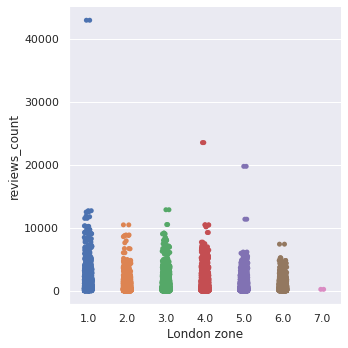

In [314]:
sns.catplot(x='London zone', y='reviews_count',data=data)

<AxesSubplot:xlabel='London zone', ylabel='count'>

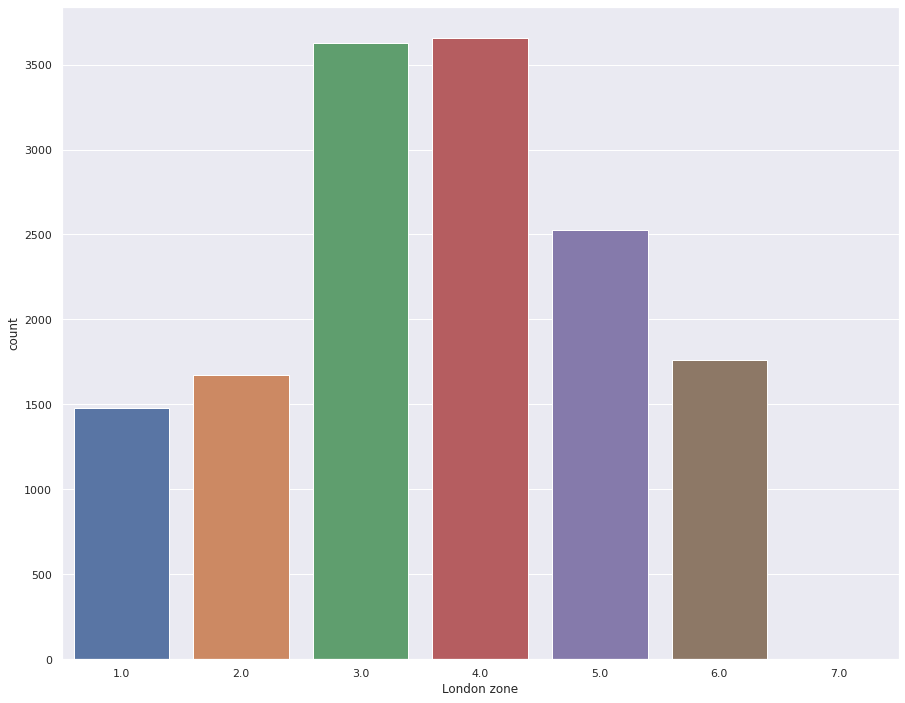

In [316]:
sns.countplot(x='London zone',data=data)

## Get data london all restaurants

In [8]:
city='london'
url = "http://ratings.food.gov.uk/search/^/%s/1/30/json"%city
response = requests.get(url).json()
page_count=int(response['FHRSEstablishment']['Header']['PageCount'])
df=json_normalize(response['FHRSEstablishment']['EstablishmentCollection']['EstablishmentDetail'])
for page in range(1,page_count):
    url = f"http://ratings.food.gov.uk/search/^/{city}/{page}/30/json"
    response = requests.get(url).json()
    df_iter = json_normalize(response['FHRSEstablishment']['EstablishmentCollection']['EstablishmentDetail'])
    df=pd.concat([df, df_iter], axis= 0)

In [9]:
df=df.reset_index(drop=True)

In [306]:
df=df.rename(columns={"PostCode": "postcode"})

In [307]:
df=df.merge(postcodes[['London zone','postcode','ITL level 2','Average Income']],how='left',on=['postcode'])

<AxesSubplot:xlabel='London zone', ylabel='count'>

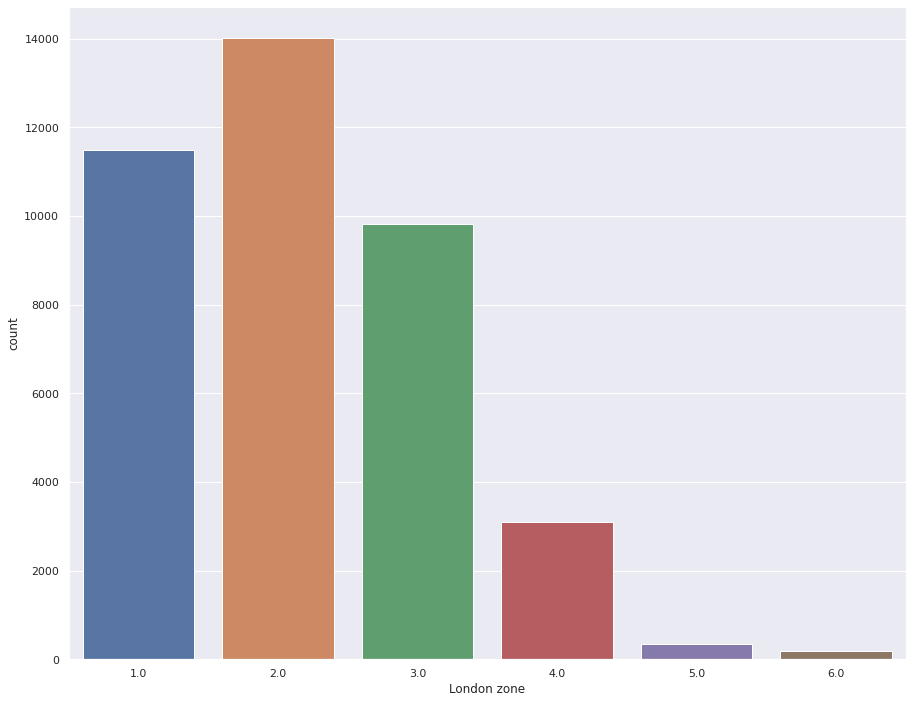

In [317]:
sns.countplot(x='London zone',data=df)

# DF if all restaurants from london and data is uber eats database

In [76]:
data['name']==df.loc[data.index]['BusinessName']
#df1.age < df2.loc[df1.index].age

0        False
1        False
2        False
3        False
4        False
         ...  
19092    False
19093    False
19094    False
19095    False
19096    False
Length: 19097, dtype: bool

In [78]:
data['name']

0                                    Cocktail bar Kosmopol
1        Restaurant Perfect Fried Chicken Eltham - 44 E...
2                          Kebab shop Reigate Kebab Centre
3                            Hot dog restaurant Oprha Dogs
4                             Restaurant Kings Doner Kebab
                               ...                        
19092                   Delivery Restaurant Salt & Vinegar
19093                    Chicken restaurant Selekt Chicken
19094                        Fried chicken takeaway Koleey
19095                                 Sandwich shop Subway
19096                          Restaurant The Woodbine Inn
Name: name, Length: 19097, dtype: object

# Try with coordinates

In [21]:
def dist(lat1, long1, lat2, long2):
    return np.abs((lat1-lat2)+(long1-long2))

In [20]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [139]:
def find_restaurant(lat, long):
    distances = df.apply(
        lambda row: dist(lat, long, float(row['Geocode.Latitude']), float(row['Geocode.Longitude'])), 
        axis=1)
    return df.loc[distances.idxmin(), 'BusinessName'],'yes'

In [165]:
def match_restaurant(lat, long):
    distances = df.apply(
        lambda row: haversine(lat, long, float(row['Geocode.Latitude']), float(row['Geocode.Longitude'])), 
        axis=1)
    closest=distances.min()
    if closest>0.005:
        return 'nomatch'
    else:
        return df.loc[distances.idxmin(), 'BusinessName'],closest


In [166]:
lat1=51.4510
lon1=0.050607
lat2=51.4098778
lon2=-0.22391
haversine(lon1, lat1, lon2, lat2)

19.572786222571484

In [170]:
dummy=data[1:30].copy()

In [173]:
data.apply(
    lambda row: match_restaurant(row['latitude'], row['longitude']), 
    axis=1)

KeyboardInterrupt: 

In [164]:
df[df['BusinessName']=='Buenos Aires']

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.Structural,Scores.ConfidenceInManagement,Geocode.Longitude,Geocode.Latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil
5454,555285,13/00008/COMM,Buenos Aires,Restaurant/Cafe/Canteen,1,2 - 4 London Road,Reigate,Surrey,None,RH2 9AN,...,0,5,-0.209681,51.238308,true,NaN,NaN,NaN,NaN,NaN


# Try with merge

In [230]:
df['Geocode.Longitude']=pd.to_numeric(df['Geocode.Longitude'],downcast='float64')
df['Geocode.Latitude']=pd.to_numeric(df['Geocode.Latitude'],downcast='float64')

KeyError: 'Geocode.Longitude'

In [176]:
df=df.rename(columns={"Geocode.Latitude": "latitude", "Geocode.Longitude": "longitude"})

In [233]:
df['longitude']=df['longitude'].round(3)
df['latitude']=df['latitude'].round(3)

In [234]:
data['longitude']=data['longitude'].round(3)
data['latitude']=data['latitude'].round(3)

In [235]:
uber=data[['latitude','longitude','name']].copy()

In [236]:
required_df = uber.merge(df,on=['latitude','longitude'],how='inner')

In [237]:
required_df

,latitude,longitude,name,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,...,NewRatingPending,Scores.Hygiene,Scores.Structural,Scores.ConfidenceInManagement,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil


In [238]:
contain_values = df[df['BusinessName'].str.contains('Kosmopol')]

In [242]:
contain_values['latitude']

19657    51.487
Name: latitude, dtype: float32

In [240]:
data

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name
0,Cocktail bar Kosmopol,"Cocktail bar,Bar,Event venue,Night club","138 Fulham Rd, South Kensington, London SW10 9...",51.487,-0.179,8.6,453.0,bars,London Central
1,Restaurant Perfect Fried Chicken Eltham - 44 E...,"Restaurant,Fast food restaurant,Fried chicken ...","44 Eltham High St, London SE9 1BT, United Kingdom",51.451,0.051,8.6,216.0,restaurants,London South Inner
2,Kebab shop Reigate Kebab Centre,Kebab shop,"6 London Rd, Reigate RH2 9HY, United Kingdom",51.238,-0.210,7.2,288.0,restaurants,London South Outer
3,Hot dog restaurant Oprha Dogs,Hot dog restaurant,"42 Newington Causeway, London SE1 6DR, United ...",51.499,-0.099,10.0,6.0,hot dog restaurant,London Central
4,Restaurant Kings Doner Kebab,Restaurant,"738 Green Ln, Dagenham RM8 1YX, United Kingdom",51.563,0.121,7.4,60.0,restaurants,London North Inner
...,...,...,...,...,...,...,...,...,...
19092,Delivery Restaurant Salt & Vinegar,"Delivery Restaurant,Fish and chips takeaway,Ta...","17 Church St, Staines TW18 4EN, United Kingdom",51.434,-0.514,7.6,162.0,fish and chips takeaway,London South Outer
19093,Chicken restaurant Selekt Chicken,Chicken restaurant,"22 Cippenham Ln, Slough SL1 5BS, United Kingdom",51.519,-0.634,7.4,144.0,restaurants,London South Outer
19094,Fried chicken takeaway Koleey,Fried chicken takeaway,"Mollison Square, Wallington SM6 9DA, United Ki...",51.353,-0.134,8.6,129.0,fried chicken takeaway,London South Inner
19095,Sandwich shop Subway,"Sandwich shop,Fast food restaurant,Takeout Res...","Lakeside Retail Park Unit A5, Grays RM20 1WN, ...",51.486,0.279,7.8,855.0,restaurants,London North Outer


# Try concat lat&long

In [11]:
df['Geocode.Longitude']=pd.to_numeric(df['Geocode.Longitude'],downcast='float')
df['Geocode.Latitude']=pd.to_numeric(df['Geocode.Latitude'],downcast='float')

In [12]:
df=df.rename(columns={"Geocode.Latitude": "latitude", "Geocode.Longitude": "longitude"})

In [13]:
data['latlon']=data.apply(
    lambda row: str(round(row['latitude'],4))+str(round(row['longitude'],4)), 
    axis=1)

In [14]:
df['latlon']=df.apply(
    lambda row: str(round(row['latitude'],4))+str(round(row['longitude'],4)), 
    axis=1)

In [15]:
data

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,latlon
0,Cocktail bar Kosmopol,"Cocktail bar,Bar,Event venue,Night club","138 Fulham Rd, South Kensington, London SW10 9...",51.487325,-0.178956,8.6,453.0,bars,London Central,51.4873-0.179
1,Restaurant Perfect Fried Chicken Eltham - 44 E...,"Restaurant,Fast food restaurant,Fried chicken ...","44 Eltham High St, London SE9 1BT, United Kingdom",51.451042,0.050607,8.6,216.0,restaurants,London South Inner,51.4510.0506
2,Kebab shop Reigate Kebab Centre,Kebab shop,"6 London Rd, Reigate RH2 9HY, United Kingdom",51.238351,-0.209680,7.2,288.0,restaurants,London South Outer,51.2384-0.2097
3,Hot dog restaurant Oprha Dogs,Hot dog restaurant,"42 Newington Causeway, London SE1 6DR, United ...",51.498652,-0.098597,10.0,6.0,hot dog restaurant,London Central,51.4987-0.0986
4,Restaurant Kings Doner Kebab,Restaurant,"738 Green Ln, Dagenham RM8 1YX, United Kingdom",51.562614,0.120967,7.4,60.0,restaurants,London North Inner,51.56260.121
...,...,...,...,...,...,...,...,...,...,...
19092,Delivery Restaurant Salt & Vinegar,"Delivery Restaurant,Fish and chips takeaway,Ta...","17 Church St, Staines TW18 4EN, United Kingdom",51.433873,-0.513896,7.6,162.0,fish and chips takeaway,London South Outer,51.4339-0.5139
19093,Chicken restaurant Selekt Chicken,Chicken restaurant,"22 Cippenham Ln, Slough SL1 5BS, United Kingdom",51.518997,-0.634023,7.4,144.0,restaurants,London South Outer,51.519-0.634
19094,Fried chicken takeaway Koleey,Fried chicken takeaway,"Mollison Square, Wallington SM6 9DA, United Ki...",51.353401,-0.134395,8.6,129.0,fried chicken takeaway,London South Inner,51.3534-0.1344
19095,Sandwich shop Subway,"Sandwich shop,Fast food restaurant,Takeout Res...","Lakeside Retail Park Unit A5, Grays RM20 1WN, ...",51.486095,0.278740,7.8,855.0,restaurants,London North Outer,51.48610.2787


In [16]:
required_df = df.merge(data,on=['latlon'])

In [17]:
required_df=required_df.drop_duplicates()

In [18]:
required_df

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,latlon,name,cuisine,address,latitude_y,longitude_y,average_rating,reviews_count,merchant_category,city_name
0,1207577,19/00399/COMM,2 Bro's,Takeaway/sandwich shop,7844,378 Ballards Lane London,None,None,None,N12 0EE,...,51.6137-0.1766,Italian restaurant Il Funghetto,"Italian restaurant,Pizza restaurant","368, 372 Ballards Ln, London N12 0EE, United K...",51.613685,-0.176623,8.8,1314.0,restaurants,London North Outer
2,757672,CP/34277,Esfahan Supermarket,Retailers - other,4613,374 Ballards Lane London,None,None,None,N12 0EE,...,51.6137-0.1766,Italian restaurant Il Funghetto,"Italian restaurant,Pizza restaurant","368, 372 Ballards Ln, London N12 0EE, United K...",51.613685,-0.176623,8.8,1314.0,restaurants,London North Outer
4,1373207,21/00167/COMM,Grill Hub,Takeaway/sandwich shop,7844,362 Ballards Lane London,None,None,None,N12 0EE,...,51.6137-0.1766,Italian restaurant Il Funghetto,"Italian restaurant,Pizza restaurant","368, 372 Ballards Ln, London N12 0EE, United K...",51.613685,-0.176623,8.8,1314.0,restaurants,London North Outer
6,778279,15/00202/COMM,Il Funghetto,Restaurant/Cafe/Canteen,1,368 Ballards Lane London,None,None,None,N12 0EE,...,51.6137-0.1766,Italian restaurant Il Funghetto,"Italian restaurant,Pizza restaurant","368, 372 Ballards Ln, London N12 0EE, United K...",51.613685,-0.176623,8.8,1314.0,restaurants,London North Outer
8,897095,16/00176/COMM,Mangos Indian Bangladeshi Cuisine,Restaurant/Cafe/Canteen,1,362 Ballards Lane London,None,None,None,N12 0EE,...,51.6137-0.1766,Italian restaurant Il Funghetto,"Italian restaurant,Pizza restaurant","368, 372 Ballards Ln, London N12 0EE, United K...",51.613685,-0.176623,8.8,1314.0,restaurants,London North Outer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,1097408,194357,Zaha - Street Grill,Restaurant/Cafe/Canteen,1,None,37 Theobald's Road,None,London,WC1X 8SP,...,51.5201-0.1181,"zaha street grill - zaha street grill, 37 Theo...",Restaurant,"zaha street grill, 37 Theobalds Rd, London WC1...",51.520127,-0.118064,9.8,414.0,restaurants,London Central
2072,425705,59820,Zaytoon,Restaurant/Cafe/Canteen,1,None,94-96 Cricklewood Broadway,None,London,NW2 3EL,...,51.5548-0.2128,Persian restaurant Zaytoon Restaurant,"Persian restaurant,Restaurant","94-96 Cricklewood Broadway, London NW2 3EL, Un...",51.554834,-0.212811,8.0,810.0,restaurants,London North Inner
2073,425705,59820,Zaytoon,Restaurant/Cafe/Canteen,1,None,94-96 Cricklewood Broadway,None,London,NW2 3EL,...,51.5548-0.2128,Persian restaurant Zaytoon Restaurant - 94-96 ...,"Persian restaurant,Restaurant","94-96 Cricklewood Broadway, London NW2 3EL, Un...",51.554834,-0.212811,8.0,810.0,restaurants,London North Inner
2074,1339266,199324,Zizzi,Restaurant/Cafe/Canteen,1,Unit 10,8 Central Saint Giles Piazza,None,London,WC2H 8AB,...,51.516-0.1284,Sandwich shop Which Wich Superior Sandwiches -...,"Sandwich shop,American restaurant,Fast food re...","Unit 8 Central St. Giles, London WC2H 8AG, Uni...",51.516008,-0.128401,8.8,1044.0,restaurants,London Central


In [23]:
lat1=51.4510
lon1=0.050607
lat2=lat1+0.00009
lon2=lon1
haversine(lon1, lat1, lon2, lat2)

0.010007543397970053

In [349]:
data[data['name']=='Restaurant Oodles Green Street']

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,latlon
6118,Restaurant Oodles Green Street,"Restaurant,Chinese noodle restaurant,Chinese r...","343 Green St, London E13 9AR, United Kingdom",51.536237,0.035368,7.4,873.0,restaurants,London North Inner,51.53620.0354


In [350]:
ids_common_restaurants=required_df['FHRSID']

In [351]:
df[~df['FHRSID'].isin(ids_common_restaurants)]

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
0,468824,1317,"""Rio Cinema""",Restaurant/Cafe/Canteen,1,Rio Cinema Dalston,103-107 Kingsland High Street,London,None,E8 2PB,...,5,-0.075568,51.549538,true,NaN,NaN,NaN,NaN,NaN,51.5495-0.0756
1,1177669,19/00376/COMM,% Arabica,Takeaway/sandwich shop,7844,Basement And Ground Floor,5 King Street,Covent Garden,London,WC2E 8HN,...,10,-0.124021,51.511703,true,NaN,NaN,NaN,NaN,NaN,51.5117-0.124
2,1220366,191074,% Arabica,Manufacturers/packers,7839,Railway Arch 214,Ponsford Street,Hackney,London,E9 6JU,...,5,-0.048531,51.547348,true,NaN,NaN,NaN,NaN,NaN,51.5473-0.0485
3,1225476,130435,%Arabica,Other catering premises,7841,Basement To Ground Floor,33 Broadway Market,Hackney,London,E8 4PH,...,5,-0.062051,51.536510,true,NaN,NaN,NaN,NaN,NaN,51.5365-0.0621
4,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,5,-0.010786,51.461987,true,NaN,NaN,NaN,NaN,NaN,51.462-0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43824,1001020,2017/00228/COMB,Zorba Confectionery,Retailers - other,4613,Kiosk 1010A,Westfield London Shopping Centre,Ariel Way,London,None,...,0,NaN,NaN,true,NaN,NaN,NaN,true,true,nannan
43825,1241921,20/00165/FOOD,Zorbas Greek Taverna,Restaurant/Cafe/Canteen,1,38 West Ham Lane,Stratford,London,None,E15 4PT,...,10,0.005601,51.537552,true,NaN,NaN,NaN,NaN,NaN,51.53760.0056
43826,316545,PI/000054146,Zourtos Butchers,Retailers - other,4613,113 Green Lanes,LONDON,None,None,N13 4SP,...,5,-0.109851,51.611515,true,NaN,NaN,NaN,NaN,NaN,51.6115-0.1099
43827,786285,29707,ZP & VP Butchers,Retailers - other,4613,20 London Road,King's Lynn,Norfolk,None,PE30 5PY,...,20,0.402002,52.749207,true,NaN,NaN,NaN,NaN,NaN,52.74920.402


In [295]:
df

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
0,468824,1317,"""Rio Cinema""",Restaurant/Cafe/Canteen,1,Rio Cinema Dalston,103-107 Kingsland High Street,London,None,E8 2PB,...,5,-0.076,51.549999,true,NaN,NaN,NaN,NaN,NaN,51.55-0.076
1,1177669,19/00376/COMM,% Arabica,Takeaway/sandwich shop,7844,Basement And Ground Floor,5 King Street,Covent Garden,London,WC2E 8HN,...,10,-0.124,51.512001,true,NaN,NaN,NaN,NaN,NaN,51.512-0.124
2,1220366,191074,% Arabica,Manufacturers/packers,7839,Railway Arch 214,Ponsford Street,Hackney,London,E9 6JU,...,5,-0.049,51.547001,true,NaN,NaN,NaN,NaN,NaN,51.547-0.049
3,1225476,130435,%Arabica,Other catering premises,7841,Basement To Ground Floor,33 Broadway Market,Hackney,London,E8 4PH,...,5,-0.062,51.536999,true,NaN,NaN,NaN,NaN,NaN,51.537-0.062
4,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,5,-0.011,51.462002,true,NaN,NaN,NaN,NaN,NaN,51.462-0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43825,1241921,20/00165/FOOD,Zorbas Greek Taverna,Restaurant/Cafe/Canteen,1,38 West Ham Lane,Stratford,London,None,E15 4PT,...,10,0.006,51.537998,true,NaN,NaN,NaN,NaN,NaN,51.5380.006
43826,316545,PI/000054146,Zourtos Butchers,Retailers - other,4613,113 Green Lanes,LONDON,None,None,N13 4SP,...,5,-0.110,51.612000,true,NaN,NaN,NaN,NaN,NaN,51.612-0.11
43827,786285,29707,ZP & VP Butchers,Retailers - other,4613,20 London Road,King's Lynn,Norfolk,None,PE30 5PY,...,20,0.402,52.749001,true,NaN,NaN,NaN,NaN,NaN,52.7490.402
43828,1036267,INSPF/18/217562,Zuaya,Restaurant/Cafe/Canteen,1,Basement And Ground Floor Brasenose House,35 Kensington High Street,LONDON,None,W8 5EB,...,0,-0.189,51.501999,true,NaN,NaN,NaN,NaN,NaN,51.502-0.189


In [296]:
required_df

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,latlon,name,cuisine,address,latitude_y,longitude_y,average_rating,reviews_count,merchant_category,city_name
0,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,51.462-0.011,Fast food restaurant Burger King - Lewisham,"Fast food restaurant,Delivery service,Hamburge...","128 Lewisham High St, London SE13 6JG, United ...",51.462,-0.011,7.4,2430.0,restaurants,London South Inner
2,1127762,PI/000297090,(Pitch 11+12) Stephen Thackray,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,51.462-0.011,Fast food restaurant Burger King - Lewisham,"Fast food restaurant,Delivery service,Hamburge...","128 Lewisham High St, London SE13 6JG, United ...",51.462,-0.011,7.4,2430.0,restaurants,London South Inner
4,463538,PI/000187313,(Pitch 19) Thomas Everson Jnr,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,51.462-0.011,Fast food restaurant Burger King - Lewisham,"Fast food restaurant,Delivery service,Hamburge...","128 Lewisham High St, London SE13 6JG, United ...",51.462,-0.011,7.4,2430.0,restaurants,London South Inner
6,463537,PI/000187310,(Pitch 30 ) Kenneth Jeal,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,51.462-0.011,Fast food restaurant Burger King - Lewisham,"Fast food restaurant,Delivery service,Hamburge...","128 Lewisham High St, London SE13 6JG, United ...",51.462,-0.011,7.4,2430.0,restaurants,London South Inner
8,256421,PI/000019824,(Pitch 37) John Price,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,51.462-0.011,Fast food restaurant Burger King - Lewisham,"Fast food restaurant,Delivery service,Hamburge...","128 Lewisham High St, London SE13 6JG, United ...",51.462,-0.011,7.4,2430.0,restaurants,London South Inner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46099,413153,01066/0156/0/000,You Me Sushi (also Trading As Crazy Vegan Sushi),Restaurant/Cafe/Canteen,1,156 Marylebone Road,London,None,None,NW1 5PN,...,51.522-0.159,Chinese restaurant Phoenix Palace - 5 Glentwor...,"Chinese restaurant,Asian restaurant,Bar,Restau...","5 Glentworth St, London NW1 5PG, United Kingdom",51.522,-0.159,8.4,3006.0,restaurants,London Central
46100,413153,01066/0156/0/000,You Me Sushi (also Trading As Crazy Vegan Sushi),Restaurant/Cafe/Canteen,1,156 Marylebone Road,London,None,None,NW1 5PN,...,51.522-0.159,Sushi restaurant You Me Sushi,"Sushi restaurant,Japanese restaurant,Seafood r...","156 Marylebone Rd, London NW1 5PN, United Kingdom",51.522,-0.159,7.6,633.0,sushi restaurant,London Central
46101,919369,09/00092/FOOD,Zam Zam,Retailers - other,4613,Unit 4,386 - 388 Green Street,Upton Park,London,E13 9AP,...,51.5360.035,Restaurant Oodles Green Street,"Restaurant,Chinese noodle restaurant,Chinese r...","343 Green St, London E13 9AR, United Kingdom",51.536,0.035,7.4,873.0,restaurants,London North Inner
46102,919369,09/00092/FOOD,Zam Zam,Retailers - other,4613,Unit 4,386 - 388 Green Street,Upton Park,London,E13 9AP,...,51.5360.035,Restaurant Oodles Green Street - 343 Green St,"Restaurant,Chinese noodle restaurant,Chinese r...","343 Green St, London E13 9AR, United Kingdom",51.536,0.035,7.4,873.0,restaurants,London North Inner


In [24]:
uber_latlon=data['latlon']

In [25]:
match_uber=df[df['latlon'].isin(uber_latlon)].copy()

In [26]:
data[data['latlon']=='51.518-0.079']

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,latlon


In [27]:
match_uber[match_uber['BusinessType']=='School/college/university']

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
3586,1014173,186927,Bermondsey community kitchen,School/college/university,7845,None,9,Market Place,London,SE16 3UQ,...,10,-0.063973,51.492741,true,NaN,NaN,NaN,NaN,NaN,51.4927-0.064
7132,713126,2002/03575/FOOD,Ch & Co Catering At Fulham Pre Preparatory School,School/college/university,7845,Fulham Preparatory School,47A Fulham High Street,London,None,SW6 3JJ,...,0,-0.209974,51.469925,true,NaN,NaN,NaN,NaN,NaN,51.4699-0.21
32884,801736,2013/00166/FOOD,Sinclair House School,School/college/university,7845,59 Fulham High Street,London,None,None,SW6 3JJ,...,NaN,-0.209974,51.469925,true,true,true,true,NaN,NaN,51.4699-0.21


In [28]:
match_uber['BusinessType'].unique()

array(['Takeaway/sandwich shop', 'Restaurant/Cafe/Canteen',
       'Retailers - supermarkets/hypermarkets', 'Retailers - other',
       'Other catering premises', 'Pub/bar/nightclub',
       'Manufacturers/packers', 'School/college/university',
       'Distributors/Transporters', 'Hotel/bed & breakfast/guest house',
       'Mobile caterer'], dtype=object)

In [29]:
not_uber=df[~df['latlon'].isin(uber_latlon)].copy()

In [30]:
not_uber.dtypes

FHRSID                                     object
LocalAuthorityBusinessID                   object
BusinessName                               object
BusinessType                               object
BusinessTypeID                             object
AddressLine1                               object
AddressLine2                               object
AddressLine3                               object
AddressLine4                               object
PostCode                                   object
RatingValue                                object
RatingKey                                  object
RightToReply                               object
RatingDate                                 object
LocalAuthorityCode                         object
LocalAuthorityName                         object
LocalAuthorityWebSite                      object
LocalAuthorityEmailAddress                 object
SchemeType                                 object
NewRatingPending                           object


In [31]:
not_uber['BusinessType'].unique()

array(['Restaurant/Cafe/Canteen', 'Takeaway/sandwich shop',
       'Manufacturers/packers', 'Other catering premises',
       'Retailers - other', 'Hotel/bed & breakfast/guest house',
       'Distributors/Transporters', 'Importers/Exporters',
       'Mobile caterer', 'Caring Premises', 'School/college/university',
       'Pub/bar/nightclub', 'Retailers - supermarkets/hypermarkets',
       'Farmers/growers'], dtype=object)

In [32]:
not_uber

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
0,468824,1317,"""Rio Cinema""",Restaurant/Cafe/Canteen,1,Rio Cinema Dalston,103-107 Kingsland High Street,London,None,E8 2PB,...,5,-0.075568,51.549538,true,NaN,NaN,NaN,NaN,NaN,51.5495-0.0756
1,1177669,19/00376/COMM,% Arabica,Takeaway/sandwich shop,7844,Basement And Ground Floor,5 King Street,Covent Garden,London,WC2E 8HN,...,10,-0.124021,51.511703,true,NaN,NaN,NaN,NaN,NaN,51.5117-0.124
2,1220366,191074,% Arabica,Manufacturers/packers,7839,Railway Arch 214,Ponsford Street,Hackney,London,E9 6JU,...,5,-0.048531,51.547348,true,NaN,NaN,NaN,NaN,NaN,51.5473-0.0485
3,1225476,130435,%Arabica,Other catering premises,7841,Basement To Ground Floor,33 Broadway Market,Hackney,London,E8 4PH,...,5,-0.062051,51.536510,true,NaN,NaN,NaN,NaN,NaN,51.5365-0.0621
4,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,5,-0.010786,51.461987,true,NaN,NaN,NaN,NaN,NaN,51.462-0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43824,1001020,2017/00228/COMB,Zorba Confectionery,Retailers - other,4613,Kiosk 1010A,Westfield London Shopping Centre,Ariel Way,London,None,...,0,NaN,NaN,true,NaN,NaN,NaN,true,true,nannan
43825,1241921,20/00165/FOOD,Zorbas Greek Taverna,Restaurant/Cafe/Canteen,1,38 West Ham Lane,Stratford,London,None,E15 4PT,...,10,0.005601,51.537552,true,NaN,NaN,NaN,NaN,NaN,51.53760.0056
43826,316545,PI/000054146,Zourtos Butchers,Retailers - other,4613,113 Green Lanes,LONDON,None,None,N13 4SP,...,5,-0.109851,51.611515,true,NaN,NaN,NaN,NaN,NaN,51.6115-0.1099
43827,786285,29707,ZP & VP Butchers,Retailers - other,4613,20 London Road,King's Lynn,Norfolk,None,PE30 5PY,...,20,0.402002,52.749207,true,NaN,NaN,NaN,NaN,NaN,52.74920.402


In [33]:
data

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,latlon
0,Cocktail bar Kosmopol,"Cocktail bar,Bar,Event venue,Night club","138 Fulham Rd, South Kensington, London SW10 9...",51.487325,-0.178956,8.6,453.0,bars,London Central,51.4873-0.179
1,Restaurant Perfect Fried Chicken Eltham - 44 E...,"Restaurant,Fast food restaurant,Fried chicken ...","44 Eltham High St, London SE9 1BT, United Kingdom",51.451042,0.050607,8.6,216.0,restaurants,London South Inner,51.4510.0506
2,Kebab shop Reigate Kebab Centre,Kebab shop,"6 London Rd, Reigate RH2 9HY, United Kingdom",51.238351,-0.209680,7.2,288.0,restaurants,London South Outer,51.2384-0.2097
3,Hot dog restaurant Oprha Dogs,Hot dog restaurant,"42 Newington Causeway, London SE1 6DR, United ...",51.498652,-0.098597,10.0,6.0,hot dog restaurant,London Central,51.4987-0.0986
4,Restaurant Kings Doner Kebab,Restaurant,"738 Green Ln, Dagenham RM8 1YX, United Kingdom",51.562614,0.120967,7.4,60.0,restaurants,London North Inner,51.56260.121
...,...,...,...,...,...,...,...,...,...,...
19092,Delivery Restaurant Salt & Vinegar,"Delivery Restaurant,Fish and chips takeaway,Ta...","17 Church St, Staines TW18 4EN, United Kingdom",51.433873,-0.513896,7.6,162.0,fish and chips takeaway,London South Outer,51.4339-0.5139
19093,Chicken restaurant Selekt Chicken,Chicken restaurant,"22 Cippenham Ln, Slough SL1 5BS, United Kingdom",51.518997,-0.634023,7.4,144.0,restaurants,London South Outer,51.519-0.634
19094,Fried chicken takeaway Koleey,Fried chicken takeaway,"Mollison Square, Wallington SM6 9DA, United Ki...",51.353401,-0.134395,8.6,129.0,fried chicken takeaway,London South Inner,51.3534-0.1344
19095,Sandwich shop Subway,"Sandwich shop,Fast food restaurant,Takeout Res...","Lakeside Retail Park Unit A5, Grays RM20 1WN, ...",51.486095,0.278740,7.8,855.0,restaurants,London North Outer,51.48610.2787


# Try Address

In [369]:
data['shortaddress']=data['address'].str.split(',',expand=True)[0]

In [372]:
stnumber=data['shortaddress']

In [375]:
df[~df['AddressLine2'].isin(stnumber)]

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
0,468824,1317,"""Rio Cinema""",Restaurant/Cafe/Canteen,1,Rio Cinema Dalston,103-107 Kingsland High Street,London,None,E8 2PB,...,5,-0.075568,51.549538,true,NaN,NaN,NaN,NaN,NaN,51.5495-0.0756
1,1177669,19/00376/COMM,% Arabica,Takeaway/sandwich shop,7844,Basement And Ground Floor,5 King Street,Covent Garden,London,WC2E 8HN,...,10,-0.124021,51.511703,true,NaN,NaN,NaN,NaN,NaN,51.5117-0.124
2,1220366,191074,% Arabica,Manufacturers/packers,7839,Railway Arch 214,Ponsford Street,Hackney,London,E9 6JU,...,5,-0.048531,51.547348,true,NaN,NaN,NaN,NaN,NaN,51.5473-0.0485
3,1225476,130435,%Arabica,Other catering premises,7841,Basement To Ground Floor,33 Broadway Market,Hackney,London,E8 4PH,...,5,-0.062051,51.536510,true,NaN,NaN,NaN,NaN,NaN,51.5365-0.0621
4,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,5,-0.010786,51.461987,true,NaN,NaN,NaN,NaN,NaN,51.462-0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43825,1241921,20/00165/FOOD,Zorbas Greek Taverna,Restaurant/Cafe/Canteen,1,38 West Ham Lane,Stratford,London,None,E15 4PT,...,10,0.005601,51.537552,true,NaN,NaN,NaN,NaN,NaN,51.53760.0056
43826,316545,PI/000054146,Zourtos Butchers,Retailers - other,4613,113 Green Lanes,LONDON,None,None,N13 4SP,...,5,-0.109851,51.611515,true,NaN,NaN,NaN,NaN,NaN,51.6115-0.1099
43827,786285,29707,ZP & VP Butchers,Retailers - other,4613,20 London Road,King's Lynn,Norfolk,None,PE30 5PY,...,20,0.402002,52.749207,true,NaN,NaN,NaN,NaN,NaN,52.74920.402
43828,1036267,INSPF/18/217562,Zuaya,Restaurant/Cafe/Canteen,1,Basement And Ground Floor Brasenose House,35 Kensington High Street,LONDON,None,W8 5EB,...,0,-0.189078,51.502014,true,NaN,NaN,NaN,NaN,NaN,51.502-0.1891


In [377]:
not_uber[not_uber['AddressLine1'].isin(stnumber)]

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
19,533472,6755,036 RnB/Jollof Rice,Restaurant/Cafe/Canteen,1,47 Cricklewood Broadway,London,None,None,NW2 3JX,...,10,-0.211542,51.553127,true,NaN,NaN,NaN,NaN,NaN,51.5531-0.2115
21,680077,13/00177/COMM,1 Chiltern Street,Hotel/bed & breakfast/guest house,7842,London,None,None,None,W1U 7PA,...,5,-0.155096,51.518650,true,NaN,NaN,NaN,NaN,NaN,51.5187-0.1551
28,1268789,PI/000298262,10 Dixon Road,Distributors/Transporters,7,London,None,None,None,SE14 6NL,...,NaN,NaN,NaN,true,true,true,true,true,true,nannan
29,413781,01382/0010/0/002,10 Greek Street,Restaurant/Cafe/Canteen,1,London,None,None,None,W1D 4DH,...,10,-0.131007,51.514465,true,NaN,NaN,NaN,NaN,NaN,51.5145-0.131
49,533472,6755,036 RnB/Jollof Rice,Restaurant/Cafe/Canteen,1,47 Cricklewood Broadway,London,None,None,NW2 3JX,...,10,-0.211542,51.553127,true,NaN,NaN,NaN,NaN,NaN,51.5531-0.2115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43729,1319002,CP02670,Zeit & Zaatar,Restaurant/Cafe/Canteen,1,Shop,215 Uxbridge Road,West Ealing,London,W13 9AA,...,10,-0.319085,51.510830,true,NaN,NaN,NaN,NaN,NaN,51.5108-0.3191
43737,1427038,21/00438/COMM,Zen Vegan,Takeaway/sandwich shop,7844,Unit 3,25 Mitcham Lane,London,LONDON,SW16 6LQ,...,5,-0.133071,51.427746,true,NaN,NaN,NaN,NaN,NaN,51.4277-0.1331
43774,1366863,206516,Zia Lucia Balham,Restaurant/Cafe/Canteen,1,Ground Floor,65 Balham High Road,London,London,SW12 9AP,...,5,-0.149699,51.445942,true,NaN,NaN,NaN,NaN,NaN,51.4459-0.1497
43809,428193,06/00048/COMM,Zizzi,Restaurant/Cafe/Canteen,1,15 Cardinal Walk,London,None,None,SW1E 5JE,...,5,-0.141616,51.497433,true,NaN,NaN,NaN,NaN,NaN,51.4974-0.1416


In [379]:
data[data['shortaddress']=='47 Cricklewood Broadway']

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,latlon,shortaddress
8381,African restaurant 036rnb - 47 Cricklewood Bro...,"African restaurant,West African restaurant","47 Cricklewood Broadway, London NW2 3JX, Unite...",51.553292,-0.211725,8.8,129.0,restaurants,London North Inner,51.5533-0.2117,47 Cricklewood Broadway
12278,African restaurant 036rnb,"African restaurant,West African restaurant","47 Cricklewood Broadway, London NW2 3JX, Unite...",51.553292,-0.211725,8.8,129.0,restaurants,London North Inner,51.5533-0.2117,47 Cricklewood Broadway


# Start Working with Database not_uber

In [34]:
not_uber

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
0,468824,1317,"""Rio Cinema""",Restaurant/Cafe/Canteen,1,Rio Cinema Dalston,103-107 Kingsland High Street,London,None,E8 2PB,...,5,-0.075568,51.549538,true,NaN,NaN,NaN,NaN,NaN,51.5495-0.0756
1,1177669,19/00376/COMM,% Arabica,Takeaway/sandwich shop,7844,Basement And Ground Floor,5 King Street,Covent Garden,London,WC2E 8HN,...,10,-0.124021,51.511703,true,NaN,NaN,NaN,NaN,NaN,51.5117-0.124
2,1220366,191074,% Arabica,Manufacturers/packers,7839,Railway Arch 214,Ponsford Street,Hackney,London,E9 6JU,...,5,-0.048531,51.547348,true,NaN,NaN,NaN,NaN,NaN,51.5473-0.0485
3,1225476,130435,%Arabica,Other catering premises,7841,Basement To Ground Floor,33 Broadway Market,Hackney,London,E8 4PH,...,5,-0.062051,51.536510,true,NaN,NaN,NaN,NaN,NaN,51.5365-0.0621
4,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,5,-0.010786,51.461987,true,NaN,NaN,NaN,NaN,NaN,51.462-0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43824,1001020,2017/00228/COMB,Zorba Confectionery,Retailers - other,4613,Kiosk 1010A,Westfield London Shopping Centre,Ariel Way,London,None,...,0,NaN,NaN,true,NaN,NaN,NaN,true,true,nannan
43825,1241921,20/00165/FOOD,Zorbas Greek Taverna,Restaurant/Cafe/Canteen,1,38 West Ham Lane,Stratford,London,None,E15 4PT,...,10,0.005601,51.537552,true,NaN,NaN,NaN,NaN,NaN,51.53760.0056
43826,316545,PI/000054146,Zourtos Butchers,Retailers - other,4613,113 Green Lanes,LONDON,None,None,N13 4SP,...,5,-0.109851,51.611515,true,NaN,NaN,NaN,NaN,NaN,51.6115-0.1099
43827,786285,29707,ZP & VP Butchers,Retailers - other,4613,20 London Road,King's Lynn,Norfolk,None,PE30 5PY,...,20,0.402002,52.749207,true,NaN,NaN,NaN,NaN,NaN,52.74920.402


In [387]:
data[data['city_name']=='London Central']['latitude'].min()
data[data['city_name']=='London Central']['latitude'].max()


51.578089

In [389]:
data

,name,cuisine,address,latitude,longitude,average_rating,reviews_count,merchant_category,city_name,latlon,shortaddress
0,Cocktail bar Kosmopol,"Cocktail bar,Bar,Event venue,Night club","138 Fulham Rd, South Kensington, London SW10 9...",51.487325,-0.178956,8.6,453.0,bars,London Central,51.4873-0.179,138 Fulham Rd
1,Restaurant Perfect Fried Chicken Eltham - 44 E...,"Restaurant,Fast food restaurant,Fried chicken ...","44 Eltham High St, London SE9 1BT, United Kingdom",51.451042,0.050607,8.6,216.0,restaurants,London South Inner,51.4510.0506,44 Eltham High St
2,Kebab shop Reigate Kebab Centre,Kebab shop,"6 London Rd, Reigate RH2 9HY, United Kingdom",51.238351,-0.209680,7.2,288.0,restaurants,London South Outer,51.2384-0.2097,6 London Rd
3,Hot dog restaurant Oprha Dogs,Hot dog restaurant,"42 Newington Causeway, London SE1 6DR, United ...",51.498652,-0.098597,10.0,6.0,hot dog restaurant,London Central,51.4987-0.0986,42 Newington Causeway
4,Restaurant Kings Doner Kebab,Restaurant,"738 Green Ln, Dagenham RM8 1YX, United Kingdom",51.562614,0.120967,7.4,60.0,restaurants,London North Inner,51.56260.121,738 Green Ln
...,...,...,...,...,...,...,...,...,...,...,...
19092,Delivery Restaurant Salt & Vinegar,"Delivery Restaurant,Fish and chips takeaway,Ta...","17 Church St, Staines TW18 4EN, United Kingdom",51.433873,-0.513896,7.6,162.0,fish and chips takeaway,London South Outer,51.4339-0.5139,17 Church St
19093,Chicken restaurant Selekt Chicken,Chicken restaurant,"22 Cippenham Ln, Slough SL1 5BS, United Kingdom",51.518997,-0.634023,7.4,144.0,restaurants,London South Outer,51.519-0.634,22 Cippenham Ln
19094,Fried chicken takeaway Koleey,Fried chicken takeaway,"Mollison Square, Wallington SM6 9DA, United Ki...",51.353401,-0.134395,8.6,129.0,fried chicken takeaway,London South Inner,51.3534-0.1344,Mollison Square
19095,Sandwich shop Subway,"Sandwich shop,Fast food restaurant,Takeout Res...","Lakeside Retail Park Unit A5, Grays RM20 1WN, ...",51.486095,0.278740,7.8,855.0,restaurants,London North Outer,51.48610.2787,Lakeside Retail Park Unit A5


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

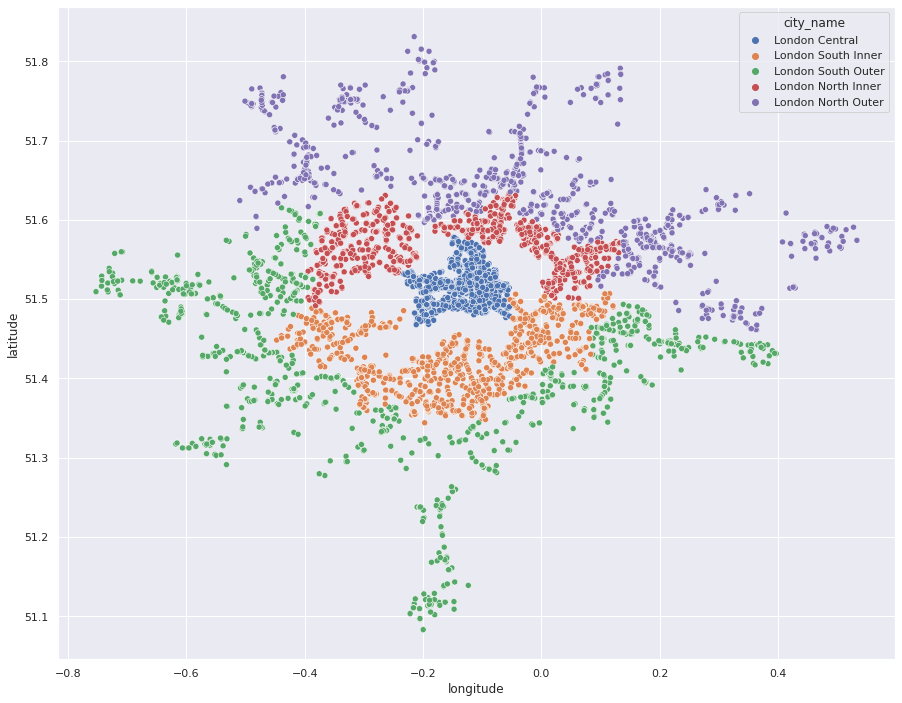

In [35]:
sns.set(rc={'figure.figsize':(15,12)})
#sns.scatterplot(data=not_uber, x="longitude", y="latitude")
sns.scatterplot(data=data, x="longitude", y="latitude", hue="city_name")

In [36]:
#sns.set(rc={'figure.figsize':(15,12)})
#sns.scatterplot(data=not_uber, x="longitude", y="latitude")

In [57]:
street_map=gpd.read_file('/home/louisedantas/code/LouiseDantas/competitor-analysis/London_Ward.shp')

<AxesSubplot:>

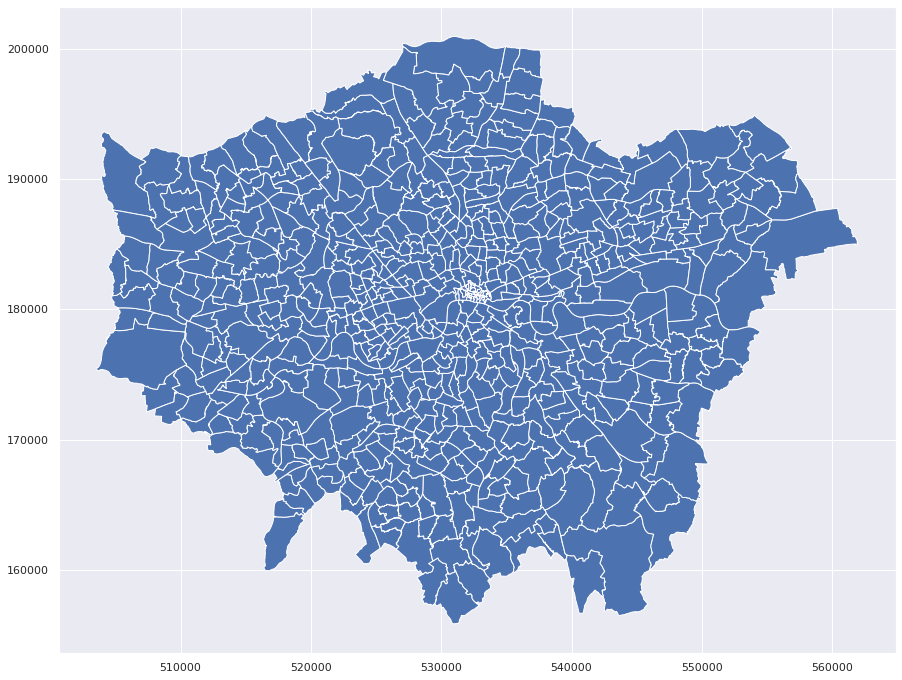

In [58]:
street_map.plot()

In [59]:
# designate coordinate system
#crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data,
 crs = "EPSG:4326",
 geometry = geometry)

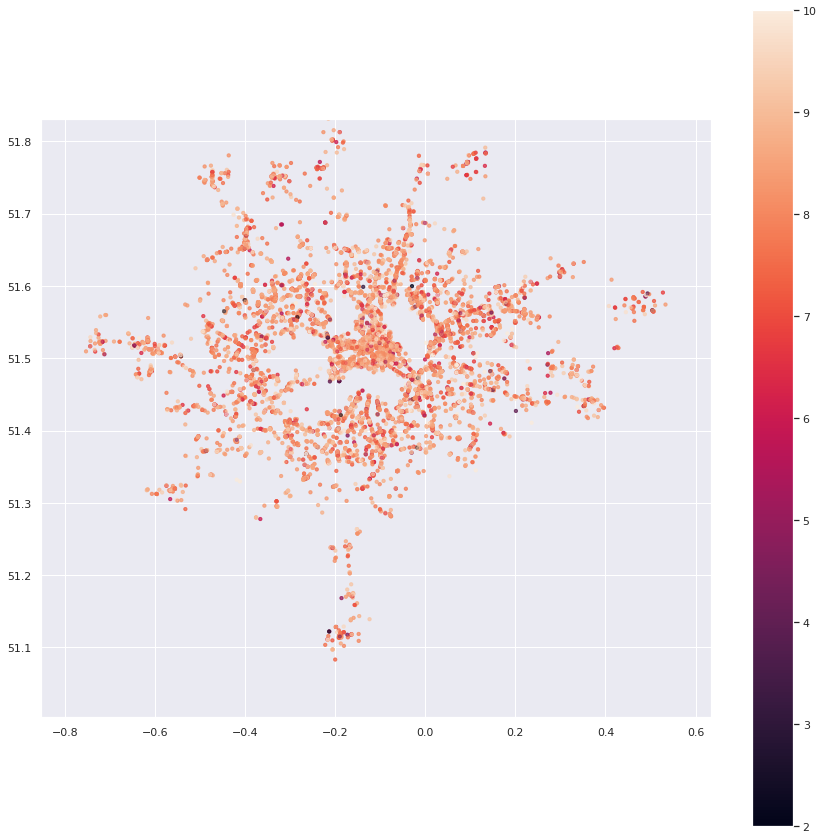

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='average_rating',ax=ax,alpha=0.5, legend=True,markersize=10)
plt.xlim(-0.8528264,0.6332845)
plt.ylim( 51.0032998,51.831089)
# show map
plt.show()

In [435]:
data['longitude'].min()

-0.7528264

# Trial 2

In [445]:
import plotly.graph_objects as go

In [447]:
fig = go.Figure(data=go.Scattergeo(
        lon = data['longitude'],
        lat = data['latitude'],
        text = data['name'],
        mode = 'markers',
        marker_color = data['average_rating'],
        ))

In [2]:
fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='europe',
    )
fig.show()

NameError: name 'fig' is not defined

# Trial 3

In [40]:
import folium
from folium.plugins import MarkerCluster

In [41]:
def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(london_map)

In [44]:
data['tuple_latlon'][0:20]

0     (51.4873248, -0.1789561)
1       (51.4510423, 0.050607)
2     (51.2383512, -0.2096799)
3      (51.4986521, -0.098597)
4      (51.5626136, 0.1209673)
5      (51.5655556, 0.0558333)
6     (51.5707421, -0.1164771)
7     (51.5526205, -0.2852837)
8     (51.6539067, -0.2012541)
9     (51.5144313, -0.1616464)
10     (51.4557493, 0.0511527)
11    (51.3194413, -0.1393975)
12     (51.365613, -0.0992451)
13    (51.4459039, -0.0186339)
14       (51.4433867, 0.21953)
15    (51.5603736, -0.2801862)
16    (51.5337887, -0.1089514)
17    (51.7483442, -0.3329735)
18     (51.4872933, 0.2840667)
19    (51.5456516, -0.4784829)
Name: tuple_latlon, dtype: object

In [42]:
data['tuple_latlon']=list(zip(data['latitude'],data['longitude']))

In [55]:
coords=[51.5072, 0.1276]
london_map=folium.Map(location=coords,zoom_start=12)
for coord in data['tuple_latlon'][0:1000]:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=1 ).add_to( london_map )
#london_map

In [ ]:
folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=1 ).add_to( london_map )

# Restaurant Density

In [66]:
unique_postcode=len(df['PostCode'].unique())

In [71]:
df

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,AddressLine4,PostCode,...,Scores.ConfidenceInManagement,longitude,latitude,Distance.@xsi:nil,Scores.Hygiene.@xsi:nil,Scores.Structural.@xsi:nil,Scores.ConfidenceInManagement.@xsi:nil,Geocode.Longitude.@xsi:nil,Geocode.Latitude.@xsi:nil,latlon
0,468824,1317,"""Rio Cinema""",Restaurant/Cafe/Canteen,1,Rio Cinema Dalston,103-107 Kingsland High Street,London,None,E8 2PB,...,5,-0.075568,51.549538,true,NaN,NaN,NaN,NaN,NaN,51.5495-0.0756
1,1177669,19/00376/COMM,% Arabica,Takeaway/sandwich shop,7844,Basement And Ground Floor,5 King Street,Covent Garden,London,WC2E 8HN,...,10,-0.124021,51.511703,true,NaN,NaN,NaN,NaN,NaN,51.5117-0.124
2,1220366,191074,% Arabica,Manufacturers/packers,7839,Railway Arch 214,Ponsford Street,Hackney,London,E9 6JU,...,5,-0.048531,51.547348,true,NaN,NaN,NaN,NaN,NaN,51.5473-0.0485
3,1225476,130435,%Arabica,Other catering premises,7841,Basement To Ground Floor,33 Broadway Market,Hackney,London,E8 4PH,...,5,-0.062051,51.536510,true,NaN,NaN,NaN,NaN,NaN,51.5365-0.0621
4,463541,PI/000187321,( Pitches 46 & 47 & 48)Jean Hogg,Retailers - other,4613,Lewisham Market,Lewisham High Street,Hither Green,London,SE13 6JG,...,5,-0.010786,51.461987,true,NaN,NaN,NaN,NaN,NaN,51.462-0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43825,1241921,20/00165/FOOD,Zorbas Greek Taverna,Restaurant/Cafe/Canteen,1,38 West Ham Lane,Stratford,London,None,E15 4PT,...,10,0.005601,51.537552,true,NaN,NaN,NaN,NaN,NaN,51.53760.0056
43826,316545,PI/000054146,Zourtos Butchers,Retailers - other,4613,113 Green Lanes,LONDON,None,None,N13 4SP,...,5,-0.109851,51.611515,true,NaN,NaN,NaN,NaN,NaN,51.6115-0.1099
43827,786285,29707,ZP & VP Butchers,Retailers - other,4613,20 London Road,King's Lynn,Norfolk,None,PE30 5PY,...,20,0.402002,52.749207,true,NaN,NaN,NaN,NaN,NaN,52.74920.402
43828,1036267,INSPF/18/217562,Zuaya,Restaurant/Cafe/Canteen,1,Basement And Ground Floor Brasenose House,35 Kensington High Street,LONDON,None,W8 5EB,...,0,-0.189078,51.502014,true,NaN,NaN,NaN,NaN,NaN,51.502-0.1891


In [72]:
postcodes = pd.read_csv("/home/louisedantas/code/LouiseDantas/competitor-analysis/London postcodes.csv")

/home/louisedantas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
postcodes

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area,ITL level 2,ITL level 3,UPRNs,Distance to sea
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,NaN,Bromley,Bromley Town,...,Metropolitan Police,Thames Water,9F32C228+J5,63100,NaN,London,Outer London - South,Bromley,"10070014435,10070014436,10070014437,1007001443...",28.0730
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,NaN,Bromley,Bromley Town,...,Metropolitan Police,Thames Water,9F32C248+G3,56100,NaN,London,Outer London - South,Bromley,"10070008860,10070008861,10070008862,1007000886...",27.9776
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,NaN,Bromley,Bromley Town,...,Metropolitan Police,NaN,9F32C228+2M,63100,NaN,London,Outer London - South,Bromley,NaN,28.0211
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,NaN,Bromley,Bromley Town,...,Metropolitan Police,Thames Water,9F32C237+RM,63100,NaN,London,Outer London - South,Bromley,"10003640209,10070000614,10070002658,1007000265...",28.0861
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,NaN,Bromley,Bromley Town,...,Metropolitan Police,Thames Water,9F32C227+HX,63100,NaN,London,Outer London - South,Bromley,"10070014484,10070014485,10070014486,1007001448...",28.1083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326209,WD3 8UX,Yes,51.624762,-0.494021,504345,192845,TQ043928,NaN,Hillingdon,Harefield,...,Metropolitan Police,Affinity Water,9C3XJGF4+W9,54200,Thames Water,Slough and Heathrow,Outer London - West and North West,Harrow and Hillingdon,"10001115819,10003001463,10015400810,1002279707...",65.3523
326210,WD3 8UZ,Yes,51.626955,-0.494143,504332,193089,TQ043930,NaN,Hillingdon,Harefield,...,Metropolitan Police,Affinity Water,9C3XJGG4+Q8,54200,Thames Water,Slough and Heathrow,Outer London - West and North West,Harrow and Hillingdon,"10092983576,200002816238,200002816239,20000281...",65.4296
326211,WD3 8XD,Yes,51.628575,-0.499204,503978,193262,TQ039932,NaN,Hillingdon,Harefield,...,Metropolitan Police,Affinity Water,9C3XJGH2+C8,54200,Thames Water,Slough and Heathrow,Outer London - West and North West,Harrow and Hillingdon,"10015812780,10015813356,10015813389,1001581340...",65.8157
326212,WD6 2RN,Yes,51.643292,-0.255958,520775,195272,TQ207952,NaN,Barnet,Underhill,...,Metropolitan Police,Affinity Water,9C3XJPVV+8J,58000,Thames Water,London,Outer London - West and North West,Barnet,"200007375,200007376,200007377,200007378,200007...",50.6312


In [77]:
postcodes.columns

Index(['Postcode', 'In Use?', 'Latitude', 'Longitude', 'Easting', 'Northing',
       'Grid Ref', 'County', 'District', 'Ward', 'District Code', 'Ward Code',
       'Country', 'County Code', 'Constituency', 'Introduced', 'Terminated',
       'Parish', 'National Park', 'Population', 'Households', 'Built up area',
       'Built up sub-division', 'Lower layer super output area', 'Rural/urban',
       'Region', 'Altitude', 'London zone', 'LSOA Code', 'Local authority',
       'MSOA Code', 'Middle layer super output area', 'Parish Code',
       'Census output area', 'Constituency Code',
       'Index of Multiple Deprivation', 'Quality', 'User Type', 'Last updated',
       'Nearest station', 'Distance to station', 'Postcode area',
       'Postcode district', 'Police force', 'Water company', 'Plus Code',
       'Average Income', 'Sewage Company', 'Travel To Work Area',
       'ITL level 2', 'ITL level 3', 'UPRNs', 'Distance to sea'],
      dtype='object')

In [85]:
postcodes['Quality'].unique()

array([1, 8, 6, 5, 3, 4])